# 1 - Obtaining an MPT spectral signature using the full order solver

This tutorial illustrates how we can run a simple simulation to obtain an MPT spectral signature (MPT coefficients as a function of frequency) using the default settings used by MPT-Calculator.

First, we change the directory to the root directory of where your copy of MPT-Calculator is saved. To do this, pleased edit the variable ```Your_Path``` below to point to where your copy of MPT-Calculator is saved and check that the output is correct.

In [1]:
import os
# Please edit this line to provide the to the root directory of your copy of MPT-Calculator
Your_Path = r'C:\Users\James\Desktop\Release_Ready_MPT_Calculator\Restructured_MPT_Calculator'
os.chdir(Your_Path)
os.getcwd()


'C:\\Users\\James\\Desktop\\Release_Ready_MPT_Calculator\\Restructured_MPT_Calculator'

This is important as MPT-Calculator assumes that the current working directory is the root MPT-Calculator project folder and will not work otherwise.

We now need to import the main function. $\texttt{main.py}$ contains the starting point for MPT-Calculator. 

In [2]:
import sys
print(sys.stdout)

In [3]:
from main import main
from time import time

$\texttt{main}$ is a function taking variable input arguments for controlling the mesh size, order, geometry model, exciting frequencies, and alpha:
```python
main(h='coarse', order=2, curve_degree=5, start_stop=(), alpha='', geometry='default',
     frequency_array='default', use_OCC=False, use_POD=False, use_parallel=True, use_iterative_POD=False, 
     cpus='default', N_POD_points='default')
```
These will be explained in detail later. For now, lets run the default settings:

| | |
|---------------------------------------------|---|
|$\texttt{Geometry} = \texttt{'sphere.geo'}$  |$\texttt{Start = 1}$       |
|$\texttt{alpha = 1e-3}$                      |$\texttt{Finish = 8}$      |   
|$\texttt{h = 'coarse'}$                             |$\texttt{Points = 40}$     |
|$\texttt{Order = 2}$                         |$\texttt{Single = False}$  |
|$\texttt{Pod = False}$   |$\texttt{MultiProcessing = True}$    |
|$\texttt{use_OCC = False}$ | $\texttt{use_iterative_POD = False}$|
|$\texttt{cpus = 'default'}$ | $\texttt{N_POD_points='default'}$|

sphere.geo
generating mesh
Mesh Contains Prisms? False
N Prisms: 0, N Tets: 7592


C:\Users\James\Desktop\Release_Ready_MPT_Calculator\Restructured_MPT_Calculator\main.py:257: UserWarning: It looks like the main function was invoked from a jupyter notebook. 
Currently saving a .ipynb file is done by copying the most recent file in the .ipynb_checkpoints folder. 
Unless you saved the file before running the code, this may not be the correct file.
  warn('It looks like the main function was invoked from a jupyter notebook. \nCurrently saving a .ipynb file is done by copying the most recent file in the .ipynb_checkpoints folder. \nUnless you saved the file before running the code, this may not be the correct file.', stacklevel=1)


 mesh contains  7592 elements


Solving Theta0: 100%|█████████████████████████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]


 solved theta0 problems    
 solving theta1


Solving Theta1: 100%|███████████████████████████████████████████████████████████████| 40/40 [02:53<00:00,  4.34s/it]


Frequency Sweep complete


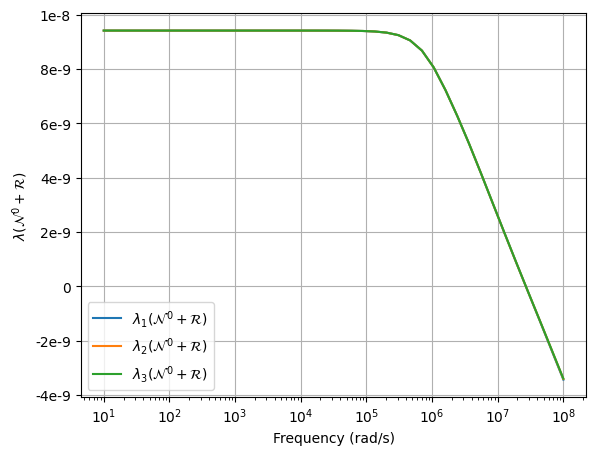

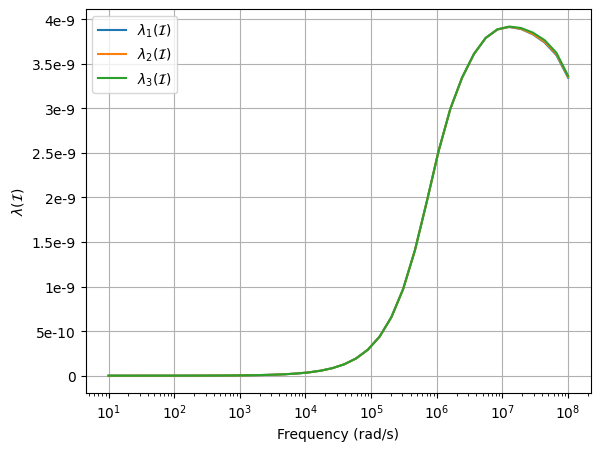

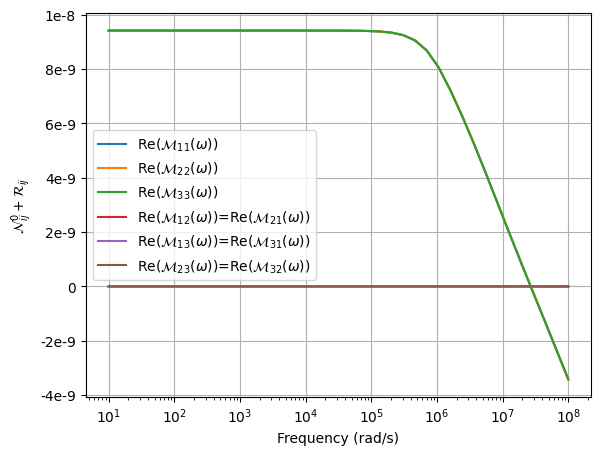

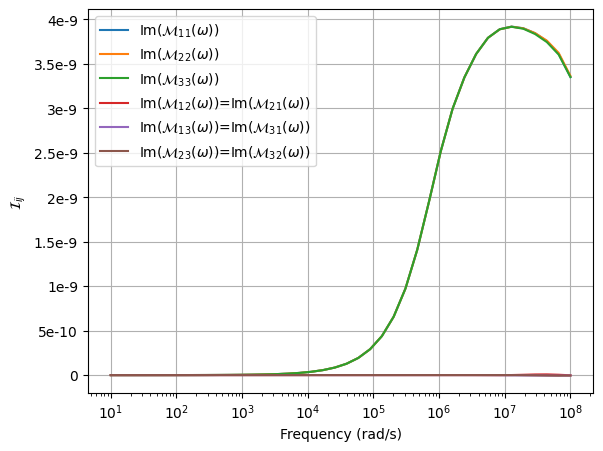

In [4]:
start_time = time();
Return_Dict = main(use_parallel=True, use_POD=False);
stop_time = time();

In [5]:
print(f'Total time = {(stop_time - start_time)/60} minutes')

Total time = 3.0349233826001485 minutes


We have just ran a simulation using the default values of MPT-Calculator. 

This computes the MPT spectral signature characterisation of a conducting sphere with $\sigma_* = 1\times 10^6$ S/m, $\mu_r=10$, and radius $\alpha=0.001$ m by constructing a coarse unstructured tetrahedral discretisation of a unit sphere set in truncated unbounded region in the form of a larger sphere of radius 100 units using order 2 elements. Note the physical object is obtained by scaling the non-dimensional computational domain by $\alpha$.

The simulation computes the MPT spectral signature for $10^1 \le \omega \le 10^8$ rad/s at 40 logarithmically spaced samples.

We can visualise the mesh that we used for this simulation via either loading it into the netgen gui, or by visualising it using Jupyter support offered by NGSolve.

## Important: 
While the default values provide a reasonable characterisation of the conducting sphere in a short computation time they should not be relied on to be fixed for all problems! In general, the simulation settings must be chosen so that they lead to a converged solution. 

<b>MPT-Calculator is based on a finite element solver and, as with all finite element solutions, it is important that we check that our numerical solutions are converged. We investigate this further in the next tutorial</b>.

## Saving Results

The output of the simulation, including any figures are saved in the 'Results' folder.

For example: 
```bash
MPT-Calculator/Results/sphere/al_0.001_mu_10_sig_1e6/1e1-1e8_40_el_7592_ord_2/
```
The results folder will contain a copy of the input files used for the simulation, including the mesh, .geo file, and a copy of the main function. This is so that the results can be recreated. The naming of the subfolders reflects

- The sphere problem that has been solved
- The object size and materials ($\alpha=0.001$ m, $\mu_r=10$, $\sigma_* = 1\times 10^6$ S/m,) by al_0.001_mu_10_sig_1e6
- The frequency range, number of samples, number of elements and element order ($10^1 \le \omega \le 10^8$ rad/s , 40 samples, 7 592 elements, $p=2$ ) by 1e1-1e8_40_el_7592_ord_2

In this folder, we save a copy of each figure produced, a copy of the input files (geo file, mesh file, settings, the original script or notebook that called main, and the main function), a copy of the plotting functions, and a copy of the raw output data. If using an OCC geometry (see Tutorial [5](./5_OCC_geometry.ipynb)) then a copy of the OCC file is also saved.

The output data is organised as a series of .csv files:
- $\texttt{Tensors.csv}$ - A complex $N \times 9$ array containing each of the tensor coefficients for the $ 3 \times 3$ rank 2 MPT for each of the $N$ frequencies of interest. Each row is a new frequency and on each row the entries are stored as ${\mathcal M}_{11}, \ldots, {\mathcal M}_{13}, {\mathcal M}_{21} \ldots, {\mathcal M}_{23}, {\mathcal M}_{31}, \ldots, {\mathcal M}_{33}$. The number of frequencies $N$ is specified by $\texttt{Points}$, here $\texttt{Points=40}$.
- $\texttt{EigenValues.csv}$ - A complex $N \times 3$ array containing each of the eigenvalues for each frequency. Note that each the entries are stored in the form of $\lambda_1 ({\mathcal R}+{\mathcal N}^0) + \rm{i} \lambda_1 ({\mathcal I}), \ldots,  \lambda_3 ({\mathcal R}+{\mathcal N}^0) + \rm{i} \lambda_3 ({\mathcal I})$ and each of the eigenvalues are sorted independently in ascending order. Also recall that ${\mathcal M}(\omega) =  {\mathcal N}^0 +{\mathcal R}(\omega)  + \rm{i} {\mathcal I}(\omega)$
- $\texttt{N0.csv}$ - A real $3 \times 3$ array storing the coefficients of the $\mathcal{N}^0$ tensor, which describes the magnetostatic response.
- $\texttt{Frequencies.csv}$ A $N \times 1$ array storing the evaluation frequencies [rad/s].
- $\texttt{Invariants}$ - A complex $N \times 3$ array containing each of the invariants for each frequency. Note that each the entries are stored in the form of $I_1 ({\mathcal R}+{\mathcal N}^0) + \rm{i} I_1 ({\mathcal I}), \ldots,  I_3 ({\mathcal R}+{\mathcal N}^0) + \rm{i} I_3 ({\mathcal I})$ and $I_1 = \lambda_1 + \lambda_2 + \lambda_3$, $I_2 = \lambda_1 \lambda_2 + \lambda_2 \lambda_3 + \lambda_3 \lambda_1$ and $I_3 = \lambda_1 \lambda_2 \lambda_3$. 

If applicable, POD output is also saved in the similarly named POD files. These files contain the equivalent output from each of the $\texttt{PODPoints}$ snapshot frequencies used by the POD mode of MPT-Calculator. Further details will be provided in later tutorials.

Finally, plotting files, PlotEditor.py, PlotterSettings.py, and PODPlotEditor.py are also saved. Running PlotEditor.py will reproduce the figures output from MPT-Calculator and allows the user to make changes to the format and presentation of the figures.

## Returning Values

Unlike the original MPT-Calculator, the new version allows the user to return variables from main.

```python
Return_Dict = main()
```
These are stored in a dictionary where each key corresponds to a specific output.
 - $\texttt{HostScriptFileName}$ is a string containing the filename (either .py or .ipynb) of the script that called the main function.
 - $\texttt{SweepName}$ is a string containing the path in the Results folder that the results have been writen to. 
 - $\texttt{TensorArray}$ is a complex $N \times 9$ array containing each of the tensor coefficients for the $3 \times 3$ rank 2 MPT for each of the $N$ frequencies of interest. Each row is a new frequency and on each row the entries are stored as ${\mathcal M}_{11}, \ldots, {\mathcal M}_{13}, {\mathcal M}_{21} \ldots, {\mathcal M}_{23}, {\mathcal M}_{31}, \ldots, {\mathcal M}_{33}$. 
 - $\texttt{EigenValues}$ is a $N\times 3$ array containing the eigenvalues for each of the $N$ frequencies. Note that each the entries are stored in the form of $\lambda_1 ({\mathcal R}+{\mathcal N}^0) + \rm{i} \lambda_1 ({\mathcal I}), \ldots,  \lambda_3 ({\mathcal R}+{\mathcal N}^0) + \rm{i} \lambda_3 ({\mathcal I})$ and each of the eigenvalues are sorted independently in ascending order. Also recall that ${\mathcal M}(\omega) = {\mathcal N}^0 +{\mathcal R}(\omega)  + \rm{i} {\mathcal I}(\omega)$
 - $\texttt{N0}$ is the real $3\times 3$ array containing the $\mathcal{N}^0$ coefficients.
 - $\texttt{NElements}$ is the integer number of total (tetrahedra and prismatic) elements in the mesh.
 - $\texttt{FrequencyArray}$ is the $N \times 1$ array containing the frequencies used for the sweep.
 - $\texttt{NDOF}$ is a tuple containing the number of degrees of freedom used for the $\boldsymbol{\theta}^{(0)}$ and $\boldsymbol{\theta}^{(1)}$ finite element spaces.
 - $\texttt{Invariants}$ - A complex $N \times 3$ array containing each of the invariants for each frequency. Note that each the entries are stored in the form of $I_1 ({\mathcal R}+{\mathcal N}^0) + \rm{i} I_1 ({\mathcal I}), \ldots,  I_3 ({\mathcal R}+{\mathcal N}^0) + \rm{i} I_3 ({\mathcal I})$ and $I_1 = \lambda_1 + \lambda_2 + \lambda_3$, $I_2 = \lambda_1 \lambda_2 + \lambda_2 \lambda_3 + \lambda_3 \lambda_1$ and $I_3 = \lambda_1 \lambda_2 \lambda_3$. 

In addition, optional return arguments are added to the dictionary depending on the settings used.
 
 - $\texttt{EddyCurrentTest}$ will contain an estimated max frequency where the eddy current model holds if $\texttt{EddyCurentTest}$ is set to True in $\texttt{Settings.py}$.
 
If the $\texttt{use_POD}$ option is used then additional outputs corresponding to the POD snapshot solutions are also returned. This will be discussed in more detail in Tutorial [4](./4_POD_solve_example.ipynb) and Tutorial [10](./10_Adaptive_POD.ipynb).

This is to make it easier to integrate the MPT-Calculator into other codebases.

Standard python dictionary arguments work here, for example, we can query the entries in the output dictionary

In [6]:
Return_Dict.keys()

dict_keys(['HostScriptFileName', 'TensorArray', 'EigenValues', 'N0', 'NElements', 'FrequencyArray', 'NDOF', 'Invariants', 'SweepName'])

and query it's content using standard Python dictionary operations. For example entering

In [7]:
Return_Dict['N0']

array([[9.41441132e-09, 4.99850040e-14, 1.69432807e-13],
       [4.99850040e-14, 9.41468505e-09, 1.87005660e-13],
       [1.69432807e-13, 1.87005660e-13, 9.41494052e-09]])

will return the $3\times 3$ array of the coefficients of $\mathcal{N}^0$ for this problem. Here, we expect the ${\mathcal N}^0$ to be a multiple of identity and we do indeed see the diagonal terms are very similar and the off-diagonal terms are much smaller by about 4 orders of magnitude. Since the MPT-Calculator involves approximations we cannot expect it to give exact answers. In future tutorials we will learn how to control these approximations.